In [32]:
from zipline.api import order_target, record, symbol
from zipline.examples import buyapple
import pandas as pd
import zipline
import pandas as pd

from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities

start_session = pd.Timestamp('2017-01-03', tz='utc')
end_session = pd.Timestamp('2019-06-28', tz='utc')

register(
    'test', # name we select for the bundle
    csvdir_equities(
        ['data'], # name of the directory as specified above (named after data frequency)
        'F:\Python Data Science', # path to directory containing the data
    ),
    calendar_name='NYSE',  # US equities
    start_session=start_session,
    end_session=end_session
)
# register?

F:\Anaconda\envs\env_zipline\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Overwriting bundle with name 'test'


<bound method CSVDIRBundle.ingest of <zipline.data.bundles.csvdir.CSVDIRBundle object at 0x000001FEEB2E8B00>>

In [13]:
def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL', 10))
    record(AAPL=data.current(symbol('AAPL'), 'price'))

In [7]:
# zipline.run_algorithm(start=pd.Timestamp('2016-01-01'),end=pd.Timestamp('2016-11-01'),capital_base=10000.0, initialize=None)


In [10]:
!zipline bundles

csvdir <no ingestions>
quandl <no ingestions>
quantopian-quandl <no ingestions>


In [20]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import zipline
# from trading_calendars import get_calendar
# from yahoofinancials import YahooFinancials
# import warnings

# plt.style.use('seaborn')
# plt.rcParams['figure.figsize'] = [16, 9]
# plt.rcParams['figure.dpi'] = 200
# warnings.simplefilter(action='ignore', category=FutureWarning)

# ticker = 'AAPL'
# yahoo_financials = YahooFinancials(ticker)

# df = yahoo_financials.get_historical_price_data('2017-01-01', '2019-06-30', 'daily')
# df = pd.DataFrame(df[ticker]['prices']).drop(['date'], axis=1).rename(columns={'formatted_date':'date'})
# df = df[['date','open','high','low','close','volume']]
# df['dividend'] = 0
# df['split'] = 1

# df.head()

In [29]:
import pandas as pd
import pytz
from collections import OrderedDict

data = OrderedDict()
tickers = ['ab']

for ticker in tickers:
    data[ticker] = pd.read_csv("{}.csv".format(ticker), index_col = 1, parse_dates=['<DTYYYYMMDD>'])
    data[ticker] = data[ticker][["<OPEN>","<HIGH>","<LOW>","<CLOSE>","<VOL>"]]
    

data[ticker] = data[ticker][::-1]
data[ticker] = data[ticker].resample('1d').mean()
data[ticker].columns = ["open","high","low","close","volume"]
print(data[ticker].columns)
print(data[ticker].head())
# print(data[ticker].resample('1d').mean())
panel = pd.Panel(data)
panel.minor_axis = ["open","high","low","close","volume"]
panel.major_axis = panel.major_axis.tz_localize(pytz.utc)
print(panel)

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
                 open     high      low    close      volume
<DTYYYYMMDD>                                                
2016-10-17     1000.0   9999.0   9999.0   9999.0  82560000.0
2016-10-18     9999.0  10498.0  10498.0  10498.0   1954419.0
2016-10-19    10498.0  11022.0  11022.0  10910.0    314876.0
2016-10-20        NaN      NaN      NaN      NaN         NaN
2016-10-21        NaN      NaN      NaN      NaN         NaN
<class 'pandas.core.panel.Panel'>
Dimensions: 1 (items) x 1158 (major_axis) x 5 (minor_axis)
Items axis: ab to ab
Major_axis axis: 2016-10-17 00:00:00+00:00 to 2019-12-18 00:00:00+00:00
Minor_axis axis: open to volume


In [33]:
from zipline.api import order, record, symbol, set_benchmark
import zipline
from datetime import datetime

def initialize(context):
    set_benchmark(symbol("ab"))
    
def handle_data(context, data):
    order(symbol("ab"), 100)
    record(AsanPardakht=data.current(symbol('ab'), 'price'))
    
perf = zipline.run_algorithm(start=datetime(2017, 1,5,0,0,0,0, pytz.utc),
                            end=datetime(2018,3,1,0,0,0,0,pytz.utc),
                             initialize=initialize,
                             capital_base=10000,
                             handle_data=handle_data,
                             data=panel)


F:\Anaconda\envs\env_zipline\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
F:\Anaconda\envs\env_zipline\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


In [31]:
perf.head()

,AsanPardakht,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-01-05 21:00:00+00:00,14662.0,NaN,0.000000,NaN,0.000000,NaN,NaN,0.00,10000.00,0.0,...,0.0,0.0,0,NaN,10000.00,0.0,0.0,1,[],0.0
2017-01-06 21:00:00+00:00,14662.0,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.00,10000.00,0.0,...,0.0,0.0,0,NaN,10000.00,0.0,0.0,2,[],0.0
2017-01-09 21:00:00+00:00,14415.0,0.132134,-0.014417,1.457168e-16,-0.016846,0.154399,0.855798,-288444.17,-278444.17,288300.0,...,0.0,0.0,0,-9.165151,10000.00,0.0,0.0,3,[{'order_id': '3150109394944e69866580c186492af...,0.0
2017-01-10 21:00:00+00:00,14415.0,0.114431,-0.014417,1.092876e-16,-0.016846,0.133713,0.855798,0.00,-278444.17,288300.0,...,0.0,0.0,0,-7.937254,-278444.17,288300.0,288300.0,4,[],0.0
2017-01-11 21:00:00+00:00,14886.0,6.704441,0.912695,2.949004e+01,0.015278,0.286325,21.552705,-297868.88,-576313.05,595440.0,...,0.0,0.0,0,456.112242,-278444.17,288300.0,288300.0,5,[{'order_id': '896f763f0ac1467ba3bdedfc49bb15d...,0.0


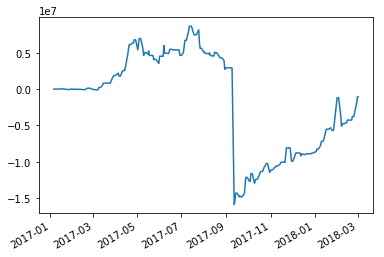

In [32]:
import matplotlib.pyplot as plt

perf.portfolio_value.plot()
plt.show()


In [27]:
zipline.__version__

'v1.3.0'